# Part Four

## DOMAIN: Sports management 

## CONTEXT: 
Company X is a sports management company for international cricket. 

## DATA DESCRIPTION: 

The data is collected belongs to batsman from IPL series conducted so far. Attribute Information: 

1. Runs: Runs score by the batsman

2. Ave: Average runs scored by the batsman per match

3. SR: strike rate of the batsman

4. Fours: number of boundary/four scored

5. Six: number of boundary/six scored

6. HF: number of half centuries scored so far

## PROJECT OBJECTIVE: 

Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

### Steps and tasks: 
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

In [1]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
sports_data = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")  
sports_data

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sports_data.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [4]:
sports_data=sports_data.dropna()
sports_data

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0


### Name attribute is not useful for PCA. So we drop that attribute.

In [5]:
Names=sports_data[['Name']]
sports_data.drop("Name", axis = 1,inplace=True)

C:\Users\ac253\AppData\Local\Temp\ipykernel_24864\772492363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_data.drop("Name", axis = 1,inplace=True)


### Univariate

<AxesSubplot:xlabel='Runs', ylabel='Count'>

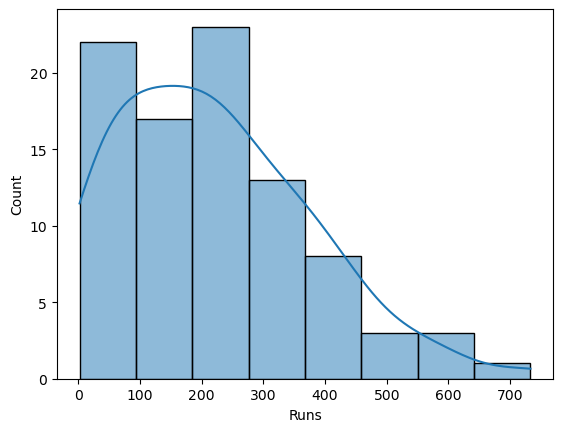

In [6]:
sns.histplot(sports_data.Runs,kde=True)

<AxesSubplot:xlabel='Ave', ylabel='Count'>

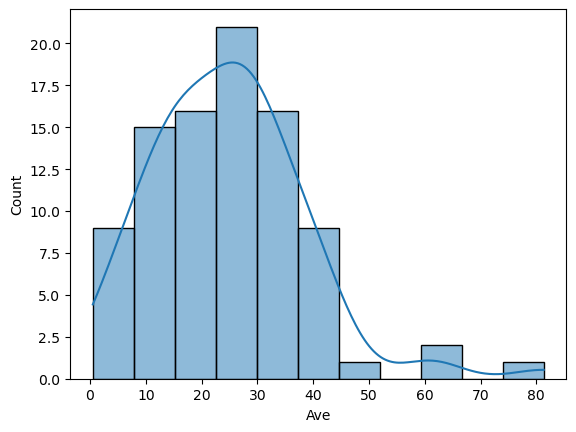

In [7]:
sns.histplot(sports_data.Ave,kde=True)

<AxesSubplot:xlabel='SR', ylabel='Count'>

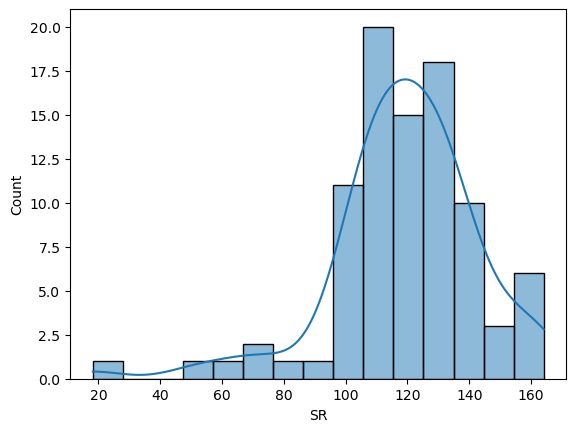

In [8]:
sns.histplot(sports_data.SR,kde=True)

<AxesSubplot:xlabel='Fours', ylabel='Count'>

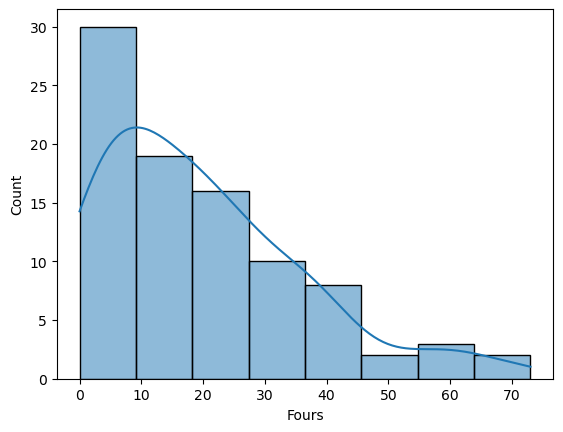

In [9]:
sns.histplot(sports_data.Fours,kde=True)

<AxesSubplot:xlabel='Sixes', ylabel='Count'>

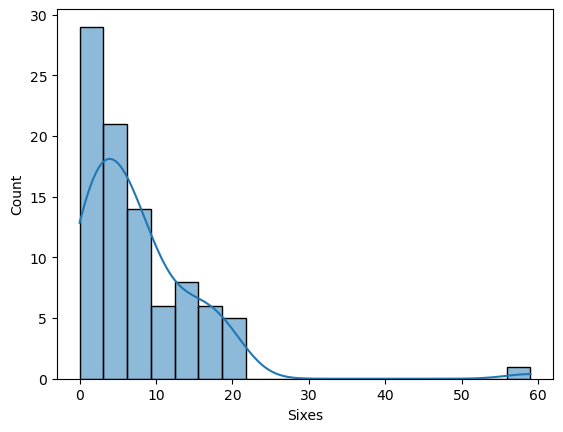

In [10]:
sns.histplot(sports_data.Sixes,kde=True)

<AxesSubplot:xlabel='HF', ylabel='Count'>

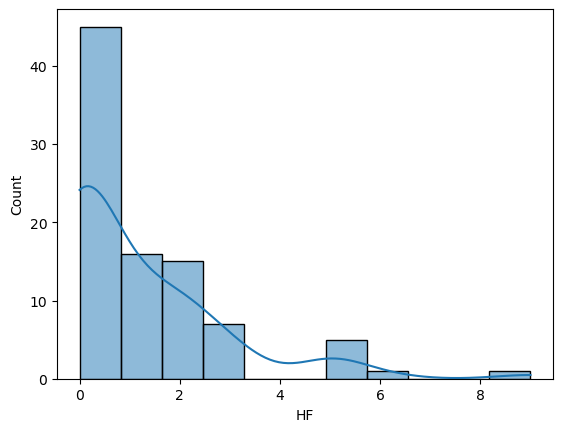

In [11]:
sns.histplot(sports_data.HF,kde=True)

Bivariate

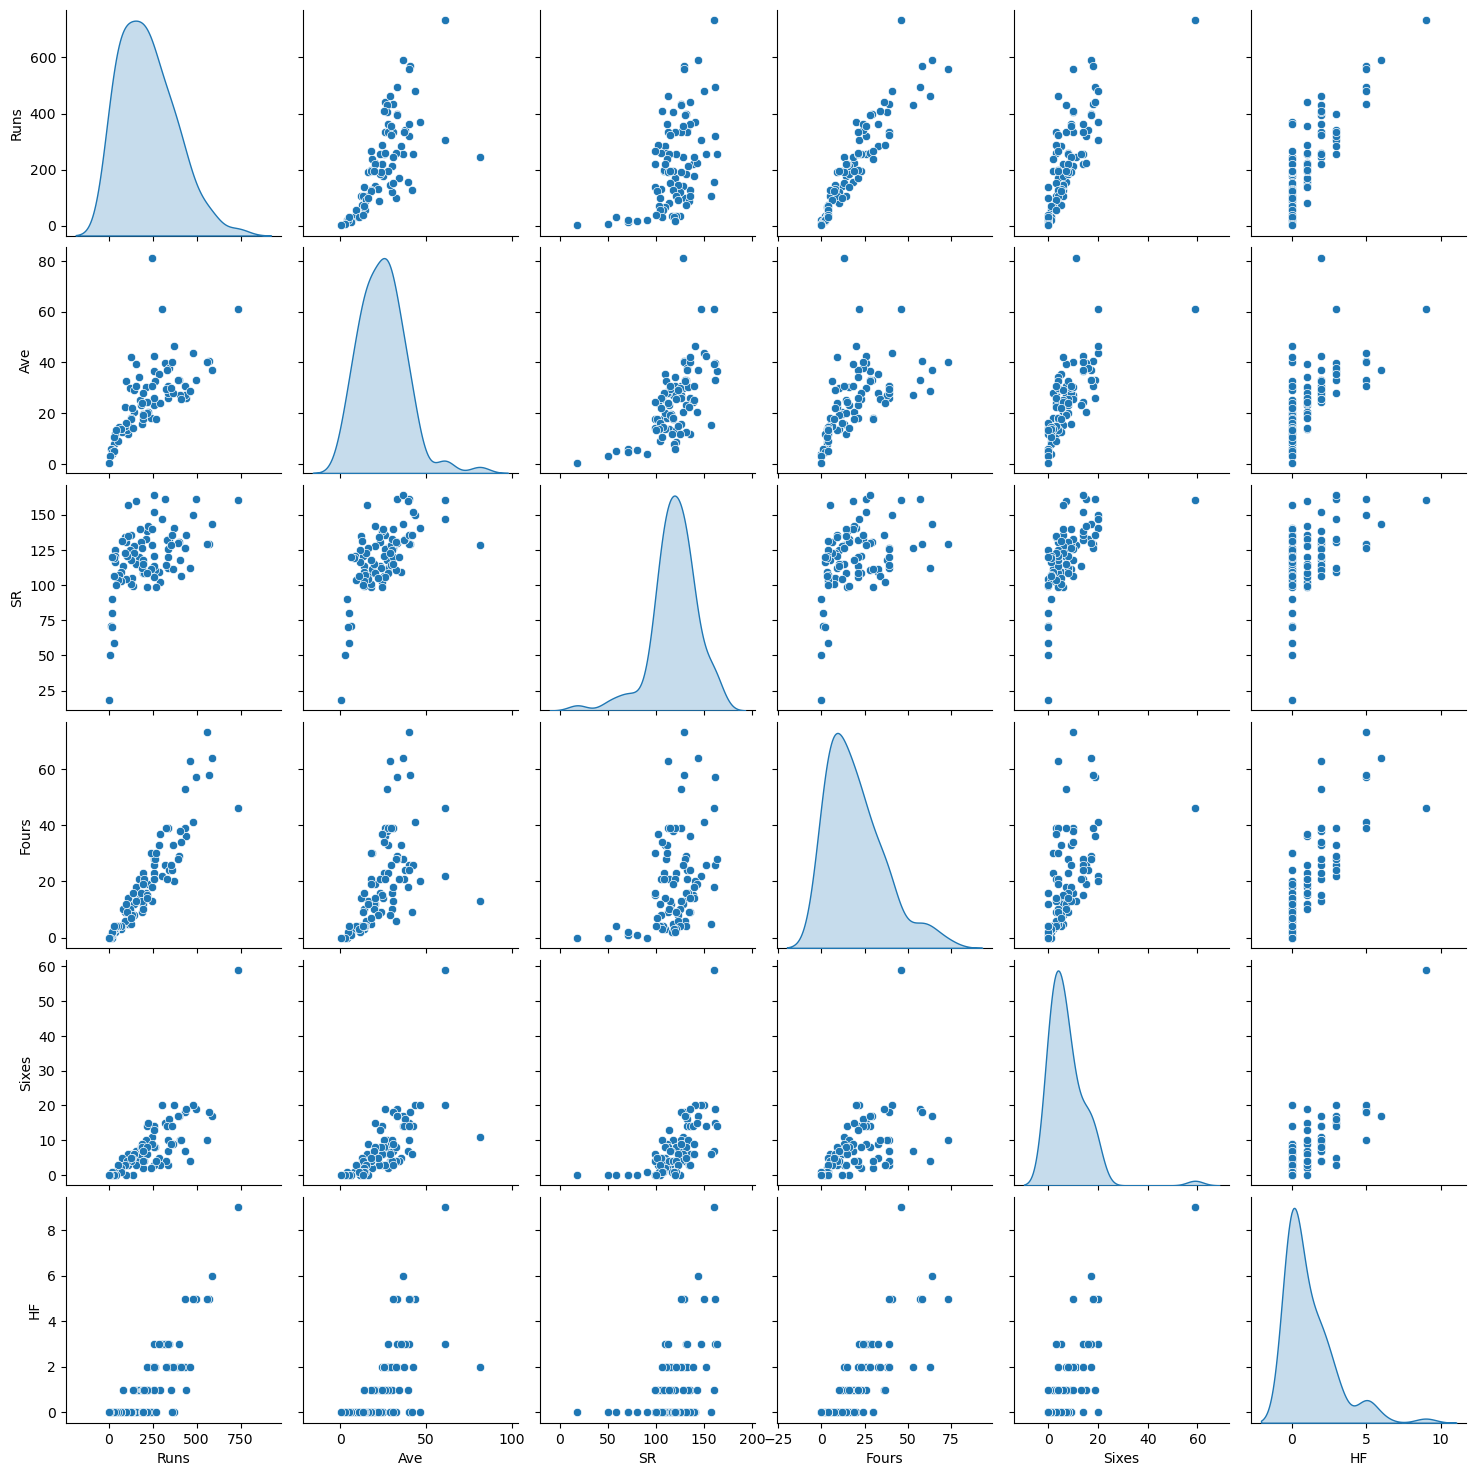

In [12]:
sns.pairplot(sports_data, diag_kind='kde')

In [13]:
from scipy.stats import zscore
sports_scaled=sports_data.apply(zscore)
sports_scaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [14]:
covMatrix = np.cov(sports_scaled,rowvar=False)
print(covMatrix)

[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [15]:
pca = PCA(n_components=6)
pca.fit(sports_scaled)

PCA(n_components=6)

The eigen Values

In [16]:
print(pca.explained_variance_)

[4.30252561 0.83636692 0.41665751 0.32912443 0.16567829 0.01706297]


The eigen Vectors

In [17]:
print(pca.components_)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]
 [ 0.45840889 -0.10122837 -0.11890348  0.09676885  0.39458014 -0.77486668]
 [ 0.70483594 -0.0606373   0.05624934 -0.58514214 -0.35786211  0.16096217]]


And the percentage of variation explained by each eigen Vector

In [18]:
print(pca.explained_variance_ratio_)

[0.70911996 0.13784566 0.06867133 0.05424458 0.02730624 0.00281223]


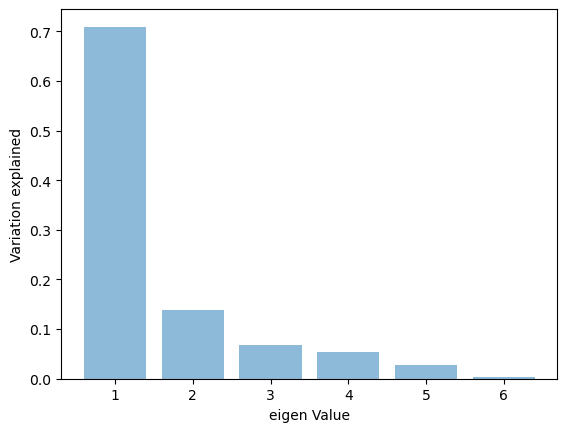

In [19]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

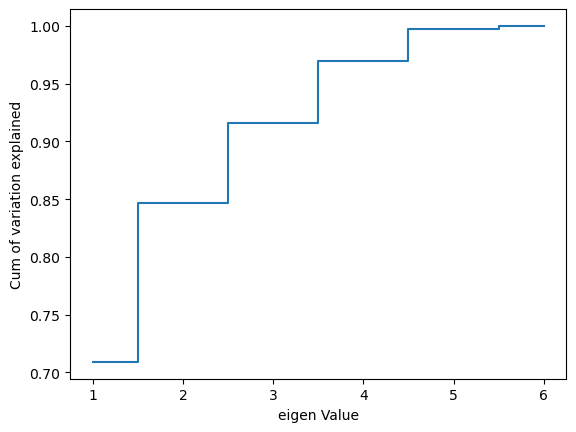

In [20]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction

Now 4 dimensions seems very reasonable. With 4 variables we can explain over 95% of the variation in the original data!

In [21]:
pca4 = PCA(n_components=4)
pca4.fit(sports_scaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(sports_scaled)
print(pca4.explained_variance_ratio_.shape)

[[ 0.4582608   0.39797313  0.3253838   0.40574167  0.41733459  0.43237178]
 [ 0.26643209 -0.33111756 -0.69780334  0.47355804 -0.17902455  0.27593225]
 [-0.10977942  0.00550486 -0.45013448 -0.50823538  0.66942589  0.28082541]
 [-0.00520142  0.84736307 -0.43275029 -0.03252305 -0.24878157 -0.17811777]]
[0.70911996 0.13784566 0.06867133 0.05424458]
(4,)


In [22]:
sports_reduced = pca4.fit_transform(sports_scaled)
recovered_sports_data = pca4.inverse_transform(sports_reduced)
recovered_sports_data

array([[ 3.41045353e+00,  2.68287003e+00,  1.79667137e+00,
         1.45361892e+00,  6.32412379e+00,  4.79335085e+00],
       [ 2.56823266e+00,  8.42479372e-01,  9.56234583e-01,
         2.84846766e+00,  1.47377779e+00,  2.36877478e+00],
       [ 2.09073447e+00,  5.56233389e-01,  1.74620418e+00,
         2.22294142e+00,  1.54525299e+00,  1.96074059e+00],
       [ 1.77049673e+00,  1.34618764e+00,  1.22033038e+00,
         1.47614352e+00,  1.85210134e+00,  1.81177575e+00],
       [ 2.27422069e+00,  1.16267336e+00,  4.21852526e-01,
         2.39490113e+00,  1.39421059e+00,  2.13784825e+00],
       [ 2.51965210e+00,  1.06904821e+00,  3.83148565e-01,
         3.21942849e+00,  4.40568431e-01,  1.91856899e+00],
       [ 8.39015075e-01,  2.63018654e+00,  1.16358661e+00,
         6.97315771e-02,  1.64473844e+00,  8.20446871e-01],
       [ 1.52301753e+00,  4.07975966e-01,  2.37549376e-01,
         1.33026772e+00,  1.59852914e+00,  1.79140096e+00],
       [ 7.80476974e-01,  1.07695341e+00,  1.722

In [23]:
score = pd.DataFrame(Xpca4.dot(pca4.explained_variance_))
score.columns=["Scores"]
score

,Scores
0,37.549352
1,20.700108
2,17.621845
3,16.846445
4,18.845023
...,...
85,-11.739703
86,-11.688061
87,-11.507797
88,-12.746019


#### Here, we have found the score of all the players in descending order